In [144]:
import pandas as pd  
import numpy as np  
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [145]:
#creating multilinear regression model, phew uh oh
df = pd.read_csv('C:\\Users\\rutme\\Documents\\GitHub\\nowaste-project\\static\\csv\\allfinaldata.csv')
df['Median Household Income'] = df['Median Household Income'].astype(float)
df


,Year,Borough,District Name,Borough ID,District Number,Food waste in tons,Population,Food Waste per person,Food waste per person in pounds,Median Household Income,...,Populationaged25withouthighschooldiploma,PercentagePopulationaged25withouthighschooldiploma,Income Diversity Index,Unemployment rate,PercentageUnemployment,RacialDiversityIndex,Poverty Rate,PercentagePoverty,Householdswithchildrenunder18yearsold,PercentageHouseholdswithchildrenunder18yearsold
0,2018,Manhattan,Financial District,1,1,173.800000,151979,0.001144,2.287158,150600.79790,...,0.049312,4.93124,6.504854,0.036574,3.65743,0.445724,0.066248,6.62483,0.169700,16.9700
1,2018,Manhattan,Chelsea/Clinton,1,4,280.800000,165452,0.001697,3.394338,102750.74690,...,0.048425,4.84253,9.651852,0.053144,5.31443,0.584941,0.111038,11.10380,0.114626,11.4626
2,2018,Manhattan,Stuyvesant Town/Turtle Bay,1,6,330.700000,143582,0.002303,4.606427,137127.72310,...,0.026701,2.67013,8.042895,0.027413,2.74129,0.497315,0.078742,7.87418,0.101177,10.1177
3,2018,Manhattan,Upper West Side,1,7,288.900000,191222,0.001511,3.021619,123835.59050,...,0.057776,5.77757,8.842105,0.050923,5.09233,0.499047,0.084594,8.45944,0.201193,20.1193
4,2018,Manhattan,Upper East Side,1,8,218.300000,204469,0.001068,2.135287,123709.54090,...,0.020145,2.01448,5.553571,0.027460,2.74598,0.406150,0.054430,5.44296,0.159944,15.9944
5,2018,Manhattan,Washington Heights/Inwood,1,12,309.400000,214040,0.001446,2.891048,54887.48097,...,0.245535,24.55350,5.734417,0.082656,8.26561,0.478139,0.184013,18.40130,0.277880,27.7880
6,2018,Bronx,Mott Haven,2,1,50.640000,164003,0.000309,0.617550,26154.27350,...,0.336913,33.69130,5.383178,0.140160,14.01600,0.465807,0.376532,37.65320,0.386882,38.6882
7,2018,Bronx,Highbridge/South Concourse,2,4,128.760000,136636,0.000942,1.884716,33932.75307,...,0.317450,31.74500,5.923077,0.104663,10.46630,0.496067,0.323691,32.36910,0.363497,36.3497
8,2018,Bronx,Belmont/East Tremont,2,6,78.720000,175456,0.000449,0.897319,26910.00000,...,0.317630,31.76300,6.520833,0.133178,13.31780,0.526428,0.376576,37.65760,0.396604,39.6604
9,2018,Bronx,Riverdale/Kingsbridge,2,8,718.900000,119846,0.005999,11.997063,55523.82810,...,0.185982,18.59820,7.417582,0.086870,8.68696,0.642990,0.188237,18.82370,0.300824,30.0824


In [146]:
#multilinear regression = mlr
y = df['Food waste per person in pounds']
x = df[['Income Diversity Index', 'RacialDiversityIndex', 'Poverty Rate', 'Householdswithchildrenunder18yearsold', 'Populationaged65']]


In [147]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])  
coeff_df


,Coefficient
Income Diversity Index,-1.180756
RacialDiversityIndex,12.918354
Poverty Rate,-92.648000
Householdswithchildrenunder18yearsold,97.824412
Populationaged65,15.706599


In [148]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1


,Actual,Predicted
11,19.657251,19.075972
20,5.696186,0.893104
24,19.034440,27.997340
17,18.057508,15.073221
2,4.606427,1.475743
25,22.565690,16.601015
26,13.775172,22.065367


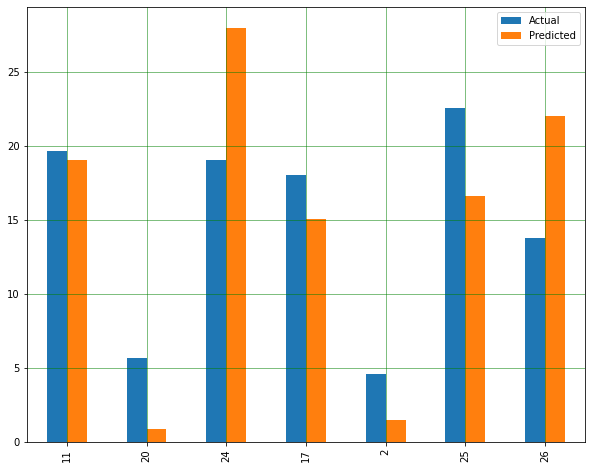

In [149]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [143]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.95958583771352
Mean Squared Error: 32.393268153441234
Root Mean Squared Error: 5.691508425140143
